## Model Training

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.311601
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.025993
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.650547
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.625921
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.685900
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.272896
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.246458
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.535298
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.403342
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.170053
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.180710
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.207033
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.425103
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.393188
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.210791
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.269680
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.210083
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.303816
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.183742
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.134936
Train Epoch: 5 [0/60

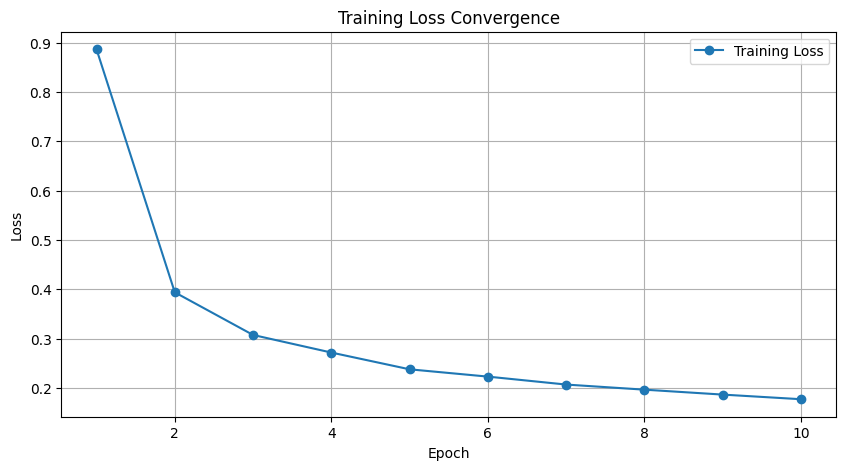

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Define the Convolutional Neural Network
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = torch.relu(F.max_pool2d(self.conv1(x), 2))
        x = torch.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = torch.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# MNIST Dataset and DataLoader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Model, Loss, Optimizer
model = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# Training the Model
def train(epoch, log_interval=200):
    model.train()
    epoch_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    return epoch_loss / len(train_loader)

# Train and collect losses over epochs
losses = []
epochs = 10
for epoch in range(1, epochs + 1):
    epoch_loss = train(epoch)
    losses.append(epoch_loss)

# Plot the training loss
plt.figure(figsize=(10,5))
plt.plot(range(1, epochs + 1), losses, 'o-', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Convergence')
plt.legend()
plt.grid(True)
plt.show()


## Generate mnist_sample.png <br>
#### Use this cell to randomly generate a mnist_sample.png to test the inference in the following cell

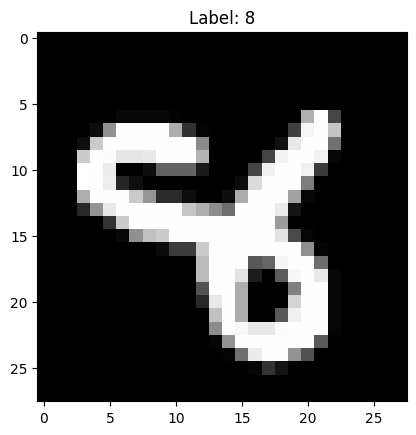

In [19]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations applied on each image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Loading the test data from the MNIST dataset
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

# Using DataLoader to load the test dataset
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

# Get a single image and label from the test dataset
images, labels = next(iter(test_loader))

# The `images` tensor shape is (1, 1, 28, 28), which corresponds to (batch_size, channels, height, width)
# Squeeze it to remove the batch dimension so matplotlib can display it
image_to_display = images[0].squeeze()

# Display the image
plt.imshow(image_to_display, cmap="gray")
plt.title(f'Label: {labels.item()}')
plt.show()

# Save the image if needed
plt.imsave('mnist_sample.png', image_to_display.numpy(), cmap='gray')


## Model Inference

In [20]:
import torch
from torchvision import transforms
from PIL import Image

# Load an image
def load_image(image_path):
    # Use the same transformations as during training
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    # Load the image
    image = Image.open(image_path)
    
    # Convert image to grayscale
    image = image.convert('L')
    
    # Apply transformations
    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension (B x C x H x W)
    return image

# Make sure to pass the path to your image
image_path = 'mnist_sample.png'
image = load_image(image_path)

# Set the model to evaluation mode
model.eval()

# No need to compute the gradient
with torch.no_grad():
    # Get predictions
    output = model(image)
    prediction = output.argmax(dim=1, keepdim=True)

print(f'Predicted Digit: {prediction.item()}')


Predicted Digit: 8
